In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import scipy.optimize
import scipy.stats
from scipy.integrate import quad
import scipy.stats as stats
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import copy
import calendar
from optimise_GDD_fctns import * #Phenology_set, run_GDD_and_get_RMSE, run_GDD_and_get_RMSE_derivs, plot_profiles_at_minimum, get_station_locations, put_ERA5_in_array

#import seaborn as sns

import plotting
import dataset_fctns
import modelling_fctns
import seaborn as sns
#from dwd_phenpy import Phenology_set

#import openeo
#import ee
## Trigger the authentication flow.
#ee.Authenticate()#(auth_mode='localhost')
# Initialize the library.
#ee.Initialize(project='ee-martinparker637')

In [ ]:
ds_inputs_DE = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\results_for_comparing\\saved_ML_datasets\\DE_ML_ERA5.csv')
for vble in ['photoperiod', 'DTF', 'dev stage', 'vpd', 'ssrd', 't2max', 't2min', 'tp']:
    ds_inputs_DE = ds_inputs_DE.drop(columns = [col for col in ds_inputs_DE.columns if vble in col])

In [ ]:
scale_values = np.arange(0.2, 0.6, 0.0125)
T_opt_values = np.arange(20, 30, 0.125)
scales, T_opts = np.meshgrid(scale_values, T_opt_values)
RMSE2s = np.zeros(T_opts.shape)
for i in range(T_opts.shape[0]):
    print(T_opt_values[i])
    for j in range(T_opts.shape[1]):
        RMSE2s[i, j] = run_GDD_and_get_RMSE_bias_term(np.array([scales[i, j], 7.5, T_opts[i, j], 39, 1.215*4]), ds_inputs_DE_reduced, 't2m', response_type='Wang', phase_list = ['beginning of flowering'], growing_period_length=300, 
                                            thresholds = [20])

20.0
20.125
20.25
20.375
20.5
20.625
20.75
20.875
21.0
21.125
21.25
21.375
21.5
21.625
21.75
21.875
22.0
22.125
22.25
22.375
22.5
22.625
22.75
22.875
23.0
23.125
23.25
23.375
23.5
23.625
23.75
23.875
24.0
24.125
24.25
24.375
24.5
24.625
24.75
24.875
25.0
25.125
25.25
25.375
25.5
25.625
25.75
25.875
26.0
26.125
26.25
26.375
26.5
26.625
26.75
26.875
27.0
27.125
27.25
27.375
27.5
27.625
27.75
27.875
28.0
28.125
28.25
28.375
28.5
28.625
28.75
28.875
29.0
29.125
29.25
29.375
29.5
29.625
29.75
29.875


In [ ]:
scale_values = np.arange(0.2, 0.6, 0.025)#125
T_opt_values = np.arange(22, 30, 0.25)#125
#scale_values = np.arange(0.2, 0.6, 0.025)#125
#T_opt_values = np.arange(20, 30, 0.25)#125
scales, T_opts = np.meshgrid(scale_values, T_opt_values)
RMSE2s = np.zeros(T_opts.shape)
for i in range(T_opts.shape[0]):
    print(T_opt_values[i])
    for j in range(T_opts.shape[1]):
        RMSE2s[i, j] = run_GDD_and_get_RMSE(np.array([scales[i, j], 7.5, T_opts[i, j], 39, 1.215*4]), ds_inputs_DE_reduced, 't2m', response_type='Convolved', phase_list = ['beginning of flowering'], growing_period_length=300, 
                                            thresholds = [20])

22.0
22.25
22.5
22.75
23.0
23.25
23.5
23.75
24.0
24.25
24.5
24.75
25.0
25.25
25.5
25.75
26.0
26.25
26.5
26.75
27.0
27.25
27.5
27.75
28.0
28.25
28.5
28.75
29.0
29.25
29.5
29.75


In [ ]:
RMSE3s = RMSE2s.copy()
RMSE3s[RMSE2s > 15] = np.nan

8.372788449339797 T_opt1 = 29.75 scale = 0.575


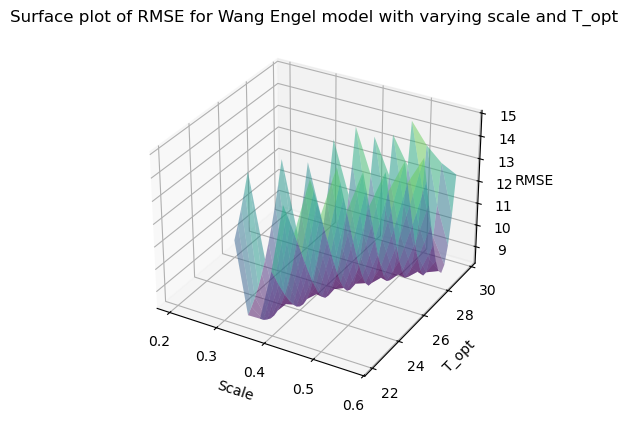

In [ ]:
fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection='3d')
 
# syntax for plotting
ax.plot_surface(scales, T_opts, RMSE3s, cmap='viridis', alpha = 0.5)#[3:-3, 4:]
ax.set(xlabel = 'Scale')
ax.set(ylabel = 'T_opt')
ax.set_title('Surface plot of RMSE for Wang Engel model with varying scale and T_opt')
ax.set(zlabel = 'RMSE')
mindex = np.unravel_index(np.argmin(RMSE2s), T_opts.shape)
mindex = (-1, -1)
#ax.scatter(scales[mindex], T_opts[mindex], RMSE2s[mindex], color = 'red', s=20)
print(RMSE2s.min(), f'T_opt1 = {T_opts[mindex]}', f'scale = {scales[mindex]}')


# Make the direction data for the arrows
#derivs = run_GDD_and_get_RMSE_derivs(np.array([scales[mindex], 7.5, T_opts[mindex], 39]), ds_inputs_DE_early, 't2m', response_type='Wang', phase_list = ['beginning of flowering'], growing_period_length=300, 
#                                            thresholds = [20])

#ax.quiver(scales[mindex], T_opts[mindex], RMSE2s[mindex], -derivs[0], -derivs[2], -3, length=1, normalize=True)

In [ ]:
scale_values = np.arange(0.2, 0.6, 0.0125)
T_opt_values = np.arange(20, 30, 0.125)
scales, T_opts = np.meshgrid(scale_values, T_opt_values)
RMSE2s = np.zeros(T_opts.shape)
for i in range(T_opts.shape[0]):
    print(T_opt_values[i])
    for j in range(T_opts.shape[1]):
        RMSE2s[i, j] = run_GDD_and_get_RMSE(np.array([scales[i, j], 7.5, T_opts[i, j], 39]), ds_inputs_DE_early, 't2m', response_type='Wang', phase_list = ['beginning of flowering'], growing_period_length=300, 
                                            thresholds = [20])

In [ ]:
RMSE3s = RMSE2s.copy()
RMSE3s[RMSE2s > 50] = np.nan

8.177678170728099 T_opt1 = 29.75 scale = 0.8749999999999998


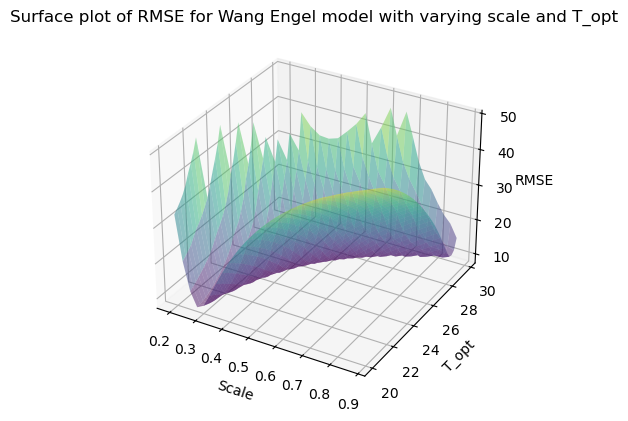

In [ ]:
fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection='3d')
 
# syntax for plotting
ax.plot_surface(scales, T_opts, RMSE3s, cmap='viridis', alpha = 0.5)#[3:-3, 4:]
ax.set(xlabel = 'Scale')
ax.set(ylabel = 'T_opt')
ax.set_title('Surface plot of RMSE for Wang Engel model with varying scale and T_opt')
ax.set(zlabel = 'RMSE')
mindex = np.unravel_index(np.argmin(RMSE2s), T_opts.shape)
mindex = (-1, -1)
#ax.scatter(scales[mindex], T_opts[mindex], RMSE2s[mindex], color = 'red', s=20)
print(RMSE2s.min(), f'T_opt1 = {T_opts[mindex]}', f'scale = {scales[mindex]}')


# Make the direction data for the arrows
#derivs = run_GDD_and_get_RMSE_derivs(np.array([scales[mindex], 7.5, T_opts[mindex], 39]), ds_inputs_DE_early, 't2m', response_type='Wang', phase_list = ['beginning of flowering'], growing_period_length=300, 
#                                            thresholds = [20])

#ax.quiver(scales[mindex], T_opts[mindex], RMSE2s[mindex], -derivs[0], -derivs[2], -3, length=1, normalize=True)